In [32]:
import requests
import polyline
import math
import random

import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

from geopy.distance import distance
from geopy.point import Point

In [8]:
def get_original(coords):
    lat, lon = coords
    return f"{lon},{lat}"

In [110]:
def get_duration(points):
    points_params = ';'.join(map(get_original, points))
    params = {
        'geometries': 'polyline6',
    }
    response = requests.get(f"http://127.0.0.1:6000/route/v1/foot/{points_params}", params=params)
    response.raise_for_status()
    routes = response.json()
    

In [111]:
def plot_gpx(df):
    plt.figure(figsize=(10, 10))
    plt.plot(df['longitude'], df['latitude'], color='red', label='Route')
    ctx.add_basemap(plt.gca(), crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
    plt.legend()
    plt.xticks([], [])
    plt.yticks([], [])
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    plt.show()

In [112]:
# We want to make sure that circle is passing through the start point.
# To achive that we pick a center point a given distance away from start point.
# Since we pick a random direction, this gives us a unique circle each time.
def get_center_point(start_coords, distance_km):
    (lat, lon) = start_coords
    
    # Generate a random bearing (direction) in degrees
    bearing = random.uniform(0, 360)

    # Create a Point object for the original latitude and longitude
    original_point = Point(lat, lon)

    # Use the geopy distance module to calculate the new point
    new_point = distance(kilometers=distance_km).destination(original_point, bearing)

    return (new_point.latitude, new_point.longitude)

In [113]:
def get_points_on_circle(center_coords, radius_km, num_points):
    (lat, lon) = center_coords
    center_point = Point(lat, lon)
    
    points = []

    # Calculate the angular interval
    angle_interval = 360 / num_points

    for i in range(num_points):
        angle = angle_interval * i
        point = distance(kilometers=radius_km).destination(point=center_point, bearing=angle)
        points.append((point.latitude, point.longitude))

    return points

In [114]:
start = (1.3096652081895739, 103.8944762995628)
distance_km = 1
number_of_points = 200

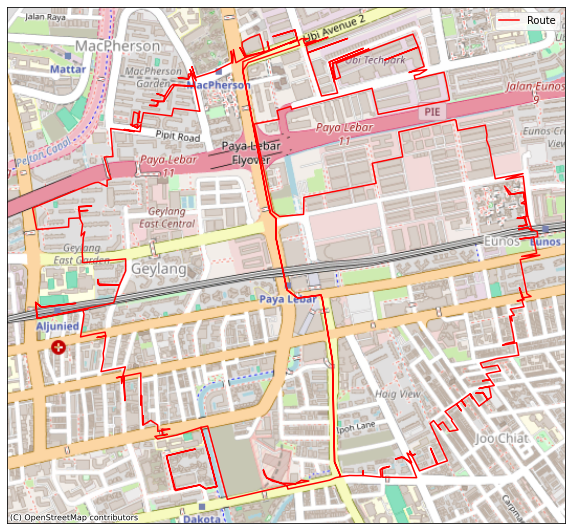

In [115]:
# Center point is not the same as the starting point.
center_point = get_center_point(start, distance_km)

# Pick random points on the circle
points = get_points_on_circle(center_point, distance_km, number_of_points)
# Make sure we start and end at the starting point
points = [(start[0], start[1])] + points + [(start[0], start[1])]

osrm_df = get_route(points)
plot_gpx(osrm_df)